In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem 
import os.path as osp
from frag import remove_dummys_mol, mol_with_atom_index, transfer_coord, linkerize_mol, fragmentize_mol,read_sdf, write_sdf, read_pkl, write_pkl, frag2mols
from frag import check_frags, check_frag, Murcko_decompose, combine_mols, Murcko_decompose_anchor, check_linkers, check_frags, qsmis
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import rdRGroupDecomposition

## Linker Fragmentation

In [2]:
# 2D fragmentation
ligand_nm = './1djy_A_rec_1djz_ip2_lig_tt_min_0.sdf'

file_name = ligand_nm.split('/')[-1].split('.')[0] #1djy_A_rec_1djz_ip2_lig_tt_min_0
mol = read_sdf(ligand_nm)[0]
Chem.SanitizeMol(mol)
fragmentations = linkerize_mol(mol)
fragmentations = check_linkers(fragmentations)
kept_frags =[]
for frag_idx, fragmentation in enumerate(fragmentations):
    try:
        linker, frags = fragmentation
        frag_mols = qsmis([frags])[0]
        kept_frags.append(frag_mols)
        frag_name = f'{file_name}_{frag_idx}.sdf' #1djy_A_rec_1djz_ip2_lig_tt_min_0_0.sdf
    except Exception as e:
        print(e)

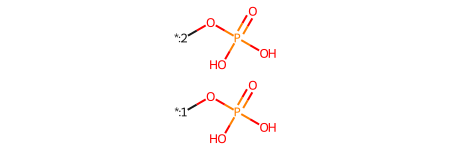

In [3]:
frag_mols

In [4]:
# 3D fragmentation

ligand_nm = './1djy_A_rec_1djz_ip2_lig_tt_min_0.sdf'

file_name = ligand_nm.split('/')[-1].split('.')[0] #1djy_A_rec_1djz_ip2_lig_tt_min_0
mol = read_sdf(ligand_nm)[0]
Chem.SanitizeMol(mol)
fragmentations = linkerize_mol(mol)
fragmentations = check_linkers(fragmentations)
kept_frags =[]
for frag_idx, fragmentation in enumerate(fragmentations):
    try:
        linker, frags = fragmentation
        frag_mols = qsmis([frags])[0]
        frag_mols, frag1_id = remove_dummys_mol(frag_mols)
        frag_mols, frag2_id = remove_dummys_mol(frag_mols)
        frag_3d = transfer_coord(frag_mols, mol)
        kept_frags.append(frag_3d)
        frag_name = f'{file_name}_{frag_idx}.sdf' #1djy_A_rec_1djz_ip2_lig_tt_min_0_0.sdf
        frag_3d.SetProp('anchor_ids',f'{frag1_id}_{frag2_id}')
    except Exception as e:
        print(e)


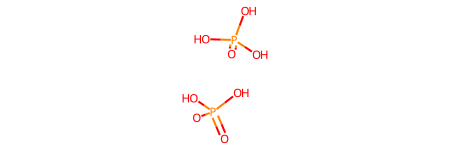

In [5]:
frag_3d

## Fragment Fragmentation

In [23]:
# 2D fragmentation

ligand_nm = './1djy_A_rec_1djz_ip2_lig_tt_min_0.sdf'

file_name = ligand_nm.split('/')[-1].split('.')[0] #1djy_A_rec_1djz_ip2_lig_tt_min_0
mol = read_sdf(ligand_nm)[0]
Chem.SanitizeMol(mol)
fragmentations = fragmentize_mol(mol)
fragmentations = check_frags(fragmentations)
kept_frags =[]
for frag_idx, fragmentation in enumerate(fragmentations):
    try:
        smis = fragmentation[1].split('.')
        mols = [Chem.MolFromSmiles(smi) for smi in smis]
        if mols[1].GetNumHeavyAtoms() < mols[0].GetNumHeavyAtoms(): 
            # first one should be smaller, is the one that to be masked
            new_mols = [mols[1], mols[0]]
            mols = new_mols
        frag1, frag2 = mols
        frag_name = f'{file_name}_{frag_idx}.sdf' #1djy_A_rec_1djz_ip2_lig_tt_min_0_0.sdf
    except Exception as e:
        print(e)


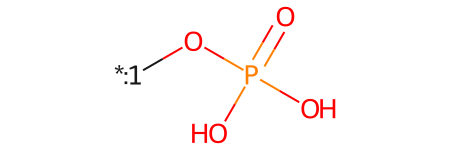

In [24]:
frag1

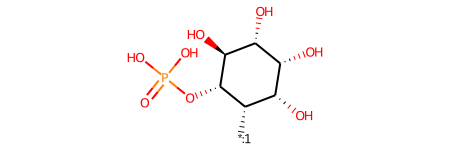

In [25]:
frag2 # Generally, we need to keep larger side for growing smaller side

In [20]:
# 3D fragmentation

ligand_nm = './1djy_A_rec_1djz_ip2_lig_tt_min_0.sdf'

file_name = ligand_nm.split('/')[-1].split('.')[0] #1djy_A_rec_1djz_ip2_lig_tt_min_0
mol = read_sdf(ligand_nm)[0]
Chem.SanitizeMol(mol)
fragmentations = fragmentize_mol(mol)
fragmentations = check_frags(fragmentations)
kept_frags =[]
for frag_idx, fragmentation in enumerate(fragmentations):
    try:
        frag1, frag2 = frag2mols(fragmentation)
        frag_3d = transfer_coord(frag2, mol)
        kept_frags.append(frag_3d)
        frag_name = f'{file_name}_{frag_idx}.sdf' #1djy_A_rec_1djz_ip2_lig_tt_min_0_0.sdf
    except Exception as e:
        print(e)


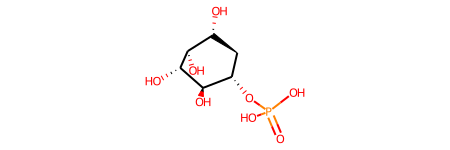

In [21]:
frag_3d

## Scaffold Fragmentation

In [19]:
# 2D fragmentation

ligand_nm = './1djy_A_rec_1djz_ip2_lig_tt_min_0.sdf'

file_name = ligand_nm.split('/')[-1].split('.')[0] #1djy_A_rec_1djz_ip2_lig_tt_min_0
mol = read_sdf(ligand_nm)[0]
Chem.SanitizeMol(mol)
scaffold = MurckoScaffold.GetScaffoldForMol(mol)
Chem.MolToSmiles(scaffold)

'C1CCCCC1'

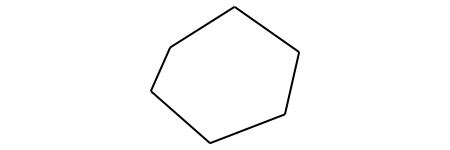

In [14]:
scaffold

In [15]:
# 3D fragmentation

ligand_nm = './1djy_A_rec_1djz_ip2_lig_tt_min_0.sdf'

file_name = ligand_nm.split('/')[-1].split('.')[0] #1djy_A_rec_1djz_ip2_lig_tt_min_0
mol = read_sdf(ligand_nm)[0]
Chem.SanitizeMol(mol)
scaffold, attch_ids = Murcko_decompose_anchor(mol)
anchor_ids = '_'.join(f'{i}' for i in attch_ids)
scaffold.SetProp('anchor_ids',anchor_ids)

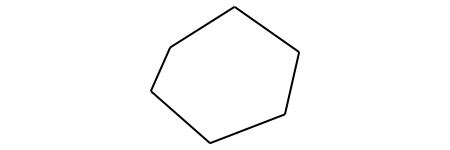

In [16]:
scaffold 

## Sidechain Decomposition

In [20]:
from frag import remove_substructure

ligand_nm = './1djy_A_rec_1djz_ip2_lig_tt_min_0.sdf'

file_name = ligand_nm.split('/')[-1].split('.')[0] #1djy_A_rec_1djz_ip2_lig_tt_min_0
mol = read_sdf(ligand_nm)[0]
Chem.SanitizeMol(mol)
scaffold = MurckoScaffold.GetScaffoldForMol(mol)
side_chains, anchor_idx = remove_substructure(mol, sub_mol=scaffold)
side_chains.SetProp('anchor_idx','_'.join([str(i) for i in anchor_idx]))

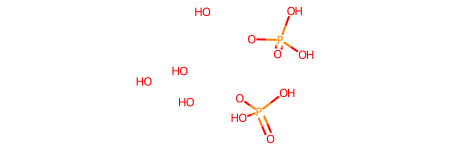

In [21]:
side_chains